# 1 - Sénario 

Aujourd’hui est un grand jour, vous commencez votre mission en tant que data analyst freelance chez BottleNeck, un marchand de vin très prestigieux. Votre manager sur cette mission (Laurent) vous accueille chaleureusement et vous propose de partager un petit café avec le reste de l’équipe du service Numérique. L’ambiance est bonne, et vous voilà déjà parfaitement intégré dans cette équipe détendue mais professionnelle.

Après les premières présentations, effectuées dans une ambiance des plus conviviales, Laurent vous explique les enjeux de votre première mission :



### 1er mail 

“Actuellement, pour gérer nos ressources, nos clients, etc., on utilise un ERP qui n’est absolument pas relié à notre site de vente en ligne. Pour être tout à fait honnête, les outils en place sont vraiment artisanaux et dans ces conditions, la gestion des stocks est vraiment complexe et notre visibilité en termes d’analyse des ventes sur le Net est vraiment réduite, car très peu de personnes ont accès au back-office. En attendant une solution plus centralisée, un rapprochement entre les 2 bases, même manuel, pourrait être très utile…

Ta première mission se passe en 3 points.

##### m1

Premièrement, j’ai besoin que tu rapproches deux exports : un export de l’ERP contenant les références produit, leur prix de vente et leur état de stock, et un export d’une table de l’outil de CMS contenant les informations des produits commercialisés en ligne (nom, description, nombre de ventes...).

L’export issu de la boutique en ligne contient le nombre de ventes pour chaque produit depuis sa mise en ligne, il ne permet pas d’analyser l'évolution des ventes dans le temps. Je vais t’envoyer un mail dès la fin de notre entretien avec ces 2 exports en pièce jointe.

En plus de ces 2 exports, tu vas bénéficier d’une aide précieuse car Sylvie, notre ancienne stagiaire, a réalisé un travail de fourmi. Elle a créé un tableau Excel qui permet d’établir le lien entre la référence du produit dans l’ERP (product_id) et la référence du même produit dans la base de la boutique en ligne (SKU). 



##### m2

Deuxièmement, une fois le rapprochement effectué, je souhaiterais avoir le chiffre d’affaires par produit, ainsi que le total du chiffre d’affaires réalisé en ligne.


##### m3

Troisièmement et pour finir, je me demande s’il n’y a pas eu des erreurs de saisie dans certains prix des produits. J'aimerais que tu effectues une analyse sur cette variable afin de détecter d’éventuelles valeurs aberrantes, de les lister et d’en faire une représentation graphique pour plus de lisibilité.

Nous voudrions présenter tes résultats lors de la prochaine réunion de COPIL. Cela permettrait de montrer nos progrès. Je peux t’épargner le travail d’une présentation par slides, il me faut juste un notebook que tu présenteras à l’assemblée pour expliquer ta démarche. Tu peux utiliser R ou Python comme tu préfères, nous n'avons pas de préférence de notre côté.”

Après vous avoir méticuleusement délivré ces consignes, Laurent vous accompagne à votre poste de travail.

Juste avant de vous laisser prendre votre mission à bras-le-corps, il vous réitère qu’il va vous faire suivre les exports par mail, ainsi que la table de liaison de Sylvie.

Le mail des exports de tables :


### 2e mail

Objet : Exports tables
De : Laurent
À : Moi

Re,

Voici les 2 exports dont nous avons parlé ce matin. Tu as le fichier issu de l’ERP (erp.xlsx) et le fichier de la table produit de notre plateforme de vente en ligne (web.xlsx). Je te laisse prendre connaissance de ces éléments.

N’hésite pas à me solliciter si tu as des questions.

Cordialement,
Laurent

Pièces jointes : 

erp.xls
web.xlsx

Le mail du tableau de liaisons :

 
### 3e mail 

Objet : Fwd: Table de liaison
De : Laurent
À : Moi


Objet: Table de liaison
De : Sylvie
À : Laurent

Bonjour Laurent,

Comme promis, voici en pièce jointe le fichier Excel qui liste les product_id de l’ERP avec leur référence côté Web. La liste des product_id est exhaustive, mais pour les références côté Web, j’en suis moins sûre... J’ai peiné à rapprocher certaines références.

Je suis désolée, mais je me rends compte à l’instant que j’ai également mal nommé la colonne dans le fichier Excel. En fait, la colonne id_web dans mon fichier correspond au SKU des produits dans la boutique en ligne.

Je profite également de ce mail pour te remercier de m’avoir permis de faire mon stage avec toi. C’était une expérience formidable, et j’ai vraiment apprécié ton aide bienveillante.

Merci.
À très bientôt.

Cordialement,
Sylvie

Pièce jointe : liaison.xlsx

# 2 - Analyses des fichiers


### 2-1 ERP

In [1]:
#On peut importer des packages

import xlrd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#On va ouvrir les fichier en questions

erp = pd.read_excel("erp.xlsx")
erp.head(5)

C:\Users\Sofiane\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [3]:
#dimension du fichier 
erp.shape

(825, 5)

In [5]:
print('NaN occurrences in ERP:')
print(erp.isnull().sum().sum())

NaN occurrences in ERP:
0


Ce fichier contient 825 lignes et 5 colonnes avec 0 valeur de NA

### 2-2 Web

In [39]:
#On va ouvrir les fichier en questions

web = pd.read_excel("web.xlsx")
web.head(6)

C:\Users\Sofiane\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,38,0,0,0,0.0,38.0,taxable,NaN,2.0,2018-04-18 12:25:58,...,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,38,0,0,0,0.0,38.0,NaN,NaN,2.0,2018-04-18 12:25:58,...,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
2,41,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-14 12:01:43,...,marcel-windholtz-eau-de-marc-de-gewurztraminer,2020-08-03 10:25:02,2020-08-03 08:25:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,41,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-04-14 12:01:43,...,marcel-windholtz-eau-de-marc-de-gewurztraminer,2020-08-03 10:25:02,2020-08-03 08:25:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
4,304,0,0,0,0.0,40.0,taxable,NaN,2.0,2018-02-13 12:57:44,...,gosset-champagne-grande-reserve,2020-08-27 11:25:02,2020-08-27 09:25:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
5,304,0,0,0,0.0,40.0,NaN,NaN,2.0,2018-02-13 12:57:44,...,gosset-champagne-grande-reserve,2020-08-27 11:25:02,2020-08-27 09:25:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [5]:
#dimension du fichier 
web.shape

(1513, 28)

In [6]:
print('NaN occurrences in web:')
print(web.isnull().sum().sum())

NaN occurrences in web:
9941


In [7]:
print('NaN occurrences in Columns:')
print(web.isnull().sum(axis = 0))

NaN occurrences in Columns:
sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64


On constate qu'il y a beaucoup de valeurs de NA dans ce jeu de données dont certaines colonnes ne contiennent que cette valeur en question. 

La colonne **sku** contient la valeur de NA dans 85 cas. Un chiffre important pour la suite du projet

### 2-3 Liaison


In [8]:
##On va ouvrir les fichier en questions

liaison = pd.read_excel("liaison.xlsx")
liaison.head(15)

C:\Users\Sofiane\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
5,4040,15303
6,4041,14975
7,4042,16042
8,4043,14980
9,4045,16041


In [11]:
#dimension du fichier 
liaison.shape

(825, 2)

In [11]:
print('NaN occurrences in liaison:')
print(liaison.isnull().sum().sum())

NaN occurrences in liaison:
91


In [12]:
print('NaN occurrences in Columns:')
print(liaison.isnull().sum(axis = 0))

NaN occurrences in Columns:
product_id     0
id_web        91
dtype: int64


On a 91 valeurs de NA dans ce jeux de données et ca concerne que la valeur de *id_web* 

# 3 - Mission

### 3-1 Test d'unicité 

Lors d'un jeu de données, un ID unique lui est attribué.

Toutefois, le nom d'artefact peut être réutilisé. Vous pouvez configurer des options dans une zone de projet afin d'appliquer l'unicité des noms pour les lignes concernés comme analyser la présence ou pas des doublons.

#### Présnce des doublons  dans la table ERP ?

On va analyser les ids pour voir si ils ont des doublons

In [17]:
#On cherche la présence des doublons dans 
erp_cpt = erp.groupby(['product_id']).size().reset_index(name='count')
erp_cpt

,product_id,count
0,3847,1
1,3849,1
2,3850,1
3,4032,1
4,4039,1
...,...,...
820,7203,1
821,7204,1
822,7247,1
823,7329,1


In [18]:
#dans l'ordre croissant

erp_cpt.sort_values(by=['count'],ascending=False)

,product_id,count
0,3847,1
554,5610,1
544,5564,1
545,5565,1
546,5566,1
...,...,...
278,4635,1
279,4636,1
280,4646,1
281,4647,1


In [19]:
#dans l'ordre décroissant

erp_cpt.sort_values(by=['count'],ascending=True)

,product_id,count
0,3847,1
543,5563,1
544,5564,1
545,5565,1
546,5566,1
...,...,...
278,4635,1
279,4636,1
280,4646,1
270,4627,1


On a une présence de 2 lignes par id 

On a le même classement donc il n'y a pas de doublons et le test d'unicité est correct . On peut donc fusionner ces données avec le jeux de donnée de '***liaison***'

On va aussi faire du nettoyage des données pour les données du site web


#### Présnce des doublons  dans la table WEB ?

On va analyser les ids pour voir si ils ont des doublons

In [22]:
#On cherche la présence des doublons dans 
web_cpt = web.groupby(['sku']).size().reset_index(name='count')
web_cpt

,sku,count
0,38,2
1,41,2
2,304,2
3,523,2
4,531,2
...,...,...
709,19820,2
710,19821,2
711,19822,2
712,13127-1,2


In [23]:
#dans l'ordre croissant
web_cpt.sort_values(by=['count','sku'],ascending=True)

,sku,count
0,38,2
1,41,2
2,304,2
3,523,2
4,531,2
...,...,...
709,19820,2
710,19821,2
711,19822,2
712,13127-1,2


In [25]:
#dans l'ordre décroissant

web_cpt.sort_values(by=['count','sku'],ascending=False)

,sku,count
713,bon-cadeau-25-euros,2
712,13127-1,2
711,19822,2
710,19821,2
709,19820,2
...,...,...
4,531,2
3,523,2
2,304,2
1,41,2


On constate qu'il y a les doublons pour chaque ID 

Allons analyser ça de plus près : 
- analyser pour un id des doublons
- choix de garder ou pas les lignes

In [41]:
#Exemple d'un id 

web38 = web[web['sku'] == 38] 
web38

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,38,0,0,0,0.0,38.0,taxable,NaN,2.0,2018-04-18 12:25:58,...,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,38,0,0,0,0.0,38.0,NaN,NaN,2.0,2018-04-18 12:25:58,...,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


On remarque qu'il y a deux lignes pour chaque ID car on a :
- une ligne pour le produit
- une ligne pour l'image du produit

Donc on prendra en compte que les produits de nom 

In [89]:
web2 = web[web['post_type'] == 'product'] 
web2.head(10)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,38,0,0,0,0.0,38.0,taxable,NaN,2.0,2018-04-18 12:25:58,...,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,41,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-14 12:01:43,...,marcel-windholtz-eau-de-marc-de-gewurztraminer,2020-08-03 10:25:02,2020-08-03 08:25:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,304,0,0,0,0.0,40.0,taxable,NaN,2.0,2018-02-13 12:57:44,...,gosset-champagne-grande-reserve,2020-08-27 11:25:02,2020-08-27 09:25:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
6,523,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-04-06 15:25:58,...,cognac-normandin-mercier-vfc,2020-08-12 16:45:03,2020-08-12 14:45:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
8,531,0,0,0,0.0,13.0,taxable,NaN,2.0,2018-07-18 15:58:02,...,champagne-petit-lebrun-fils-blanc-de-blancs-gr...,2020-08-27 15:35:03,2020-08-27 13:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
10,791,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-14 11:54:47,...,marcel-windholtz-eau-de-vie-de-baie-de-houx,2020-04-21 14:00:04,2020-04-21 12:00:04,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
12,793,0,0,0,0.0,4.0,taxable,NaN,2.0,2018-04-14 11:52:20,...,marcel-windholtz-eau-de-vie-de-coing,2019-12-23 09:30:54,2019-12-23 08:30:54,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
14,798,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-14 12:05:09,...,marcel-windholtz-eau-de-vie-de-kirsch-dalsace-...,2020-07-23 10:15:03,2020-07-23 08:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
16,802,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-14 11:48:19,...,marcel-windholtz-eau-de-vie-de-marc-de-muscat,2019-02-09 14:00:03,2019-02-09 13:00:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
18,804,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-04-14 11:59:32,...,marcel-windholtz-eau-de-mirabelle-dalsace-rese...,2020-07-23 10:15:03,2020-07-23 08:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [90]:
web2.shape

(716, 28)

In [91]:
#On fait une suppression de doublons
#web2 = web.drop_duplicates(subset ="sku")
#web2.head(20)

In [92]:
#On compte le nombre de 'Nan' présent pour chaque colonne

web2.isnull().sum()

sku                        2
virtual                    0
downloadable               0
rating_count               0
average_rating             0
total_sales                0
tax_status                 0
tax_class                716
post_author                0
post_date                  0
post_date_gmt              0
post_content             716
post_title                 0
post_excerpt               0
post_status                0
comment_status             0
ping_status                0
post_password            716
post_name                  0
post_modified              0
post_modified_gmt          0
post_content_filtered    716
post_parent                0
guid                       0
menu_order                 0
post_type                  0
post_mime_type           716
comment_count              0
dtype: int64

On va supprimer les NA dans la colonne '***sku***'

In [85]:
web2.tail(5)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1422,19822,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-11-26 10:59:10,...,tempier-bandol-cabassaou-2017,2020-01-04 13:57:04,2020-01-04 12:57:04,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1424,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1426,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1450,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1451,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


Les deux derniers ligne de ce jeux de données n'ont pas d'ID donc il est préférable de les supprimer 

In [93]:
web2 = web2.loc[0:1426,:]
web2

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,38,0,0,0,0.0,38.0,taxable,NaN,2.0,2018-04-18 12:25:58,...,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,41,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-14 12:01:43,...,marcel-windholtz-eau-de-marc-de-gewurztraminer,2020-08-03 10:25:02,2020-08-03 08:25:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,304,0,0,0,0.0,40.0,taxable,NaN,2.0,2018-02-13 12:57:44,...,gosset-champagne-grande-reserve,2020-08-27 11:25:02,2020-08-27 09:25:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
6,523,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-04-06 15:25:58,...,cognac-normandin-mercier-vfc,2020-08-12 16:45:03,2020-08-12 14:45:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
8,531,0,0,0,0.0,13.0,taxable,NaN,2.0,2018-07-18 15:58:02,...,champagne-petit-lebrun-fils-blanc-de-blancs-gr...,2020-08-27 15:35:03,2020-08-27 13:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418,19820,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-11-26 10:54:29,...,tempier-bandol-migoua-2017,2019-11-02 12:59:44,2019-11-02 11:59:44,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1420,19821,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-11-26 10:56:30,...,tempier-bandol-tourtine-2017,2019-11-02 12:59:24,2019-11-02 11:59:24,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1422,19822,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-11-26 10:59:10,...,tempier-bandol-cabassaou-2017,2020-01-04 13:57:04,2020-01-04 12:57:04,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1424,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [94]:
web2.shape

(714, 28)

### 3-2  Rapprochemnt entre les 2 exports

Après avoir analyser les doublons on va rapprocher les deux principaux exports : 
- un export de l’ERP contenant les références produit, leur prix de vente et leur état de stock,
- un export d’une table de l’outil de CMS contenant les informations des produits commercialisés en ligne (nom, description, nombre de ventes...).

On aura besoins de faire les fusions en plusieurs étapes

#### 1er fusion - erp - liaison 

On commence par faire une fusion entre le premier export des produits avec le fichier des liaisons

In [122]:
#on lit d'abord la table erp avec la liaison 

erp2 = erp.merge(liaison, on = ['product_id'])
erp2.head(10)

,product_id,onsale_web,price,stock_quantity,stock_status,id_web
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815
5,4040,1,34.3,0,outofstock,15303
6,4041,1,32.7,15,instock,14975
7,4042,1,31.2,34,instock,16042
8,4043,1,60.0,12,instock,14980
9,4045,1,42.6,66,instock,16041


In [128]:
#dimension de Erp2

erp2.shape

(734, 6)

In [125]:
print('NaN occurrences in Columns of ERP2:')
print(erp2.isnull().sum(axis = 0))

NaN occurrences in Columns of ERP2:
product_id         0
onsale_web         0
price              0
stock_quantity     0
stock_status       0
id_web            91
dtype: int64


In [127]:
#on supprimer les lignes composés de Nan

erp2 = erp2.dropna(subset=['id_web'],axis=0)
erp2

,product_id,onsale_web,price,stock_quantity,stock_status,id_web
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815
...,...,...,...,...,...,...
792,7023,1,27.5,15,instock,15891
793,7025,1,69.0,2,instock,15887
822,7247,1,54.8,23,instock,13127-1
823,7329,0,26.5,14,instock,14680-1


#### 2er fusion - erp2 (déjà fusionné) - web

On peut faire une 2e fusion avec un fichier export déjà fusionné et un export des achat des produits sur un site web

In [129]:
#on refaire une deuxieme fusion  avec le tableau fusionné et la table du site web 

web2 = web2.rename(columns = {'sku':'id_web'})
web2.head(5)

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,38,0,0,0,0.0,38.0,taxable,NaN,2.0,2018-04-18 12:25:58,...,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,41,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-14 12:01:43,...,marcel-windholtz-eau-de-marc-de-gewurztraminer,2020-08-03 10:25:02,2020-08-03 08:25:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,304,0,0,0,0.0,40.0,taxable,NaN,2.0,2018-02-13 12:57:44,...,gosset-champagne-grande-reserve,2020-08-27 11:25:02,2020-08-27 09:25:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
6,523,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-04-06 15:25:58,...,cognac-normandin-mercier-vfc,2020-08-12 16:45:03,2020-08-12 14:45:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
8,531,0,0,0,0.0,13.0,taxable,NaN,2.0,2018-07-18 15:58:02,...,champagne-petit-lebrun-fils-blanc-de-blancs-gr...,2020-08-27 15:35:03,2020-08-27 13:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [130]:
#on refait une autre fusion avec la table de ERP déjà fusionné avec la table 'liaison'

erp3 = erp2.merge(web2, on = ['id_web'])
erp3.head(4)

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,1,24.2,0,outofstock,15298,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,3849,1,34.3,0,outofstock,15296,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,3850,1,20.8,0,outofstock,15300,0,0,0,0.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,4032,1,14.1,0,outofstock,19814,0,0,0,0.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [131]:
#ON peut voir sa dimension 

erp3.shape

(714, 33)

In [132]:
erp3.columns

Index(['product_id', 'onsale_web', 'price', 'stock_quantity', 'stock_status',
       'id_web', 'virtual', 'downloadable', 'rating_count', 'average_rating',
       'total_sales', 'tax_status', 'tax_class', 'post_author', 'post_date',
       'post_date_gmt', 'post_content', 'post_title', 'post_excerpt',
       'post_status', 'comment_status', 'ping_status', 'post_password',
       'post_name', 'post_modified', 'post_modified_gmt',
       'post_content_filtered', 'post_parent', 'guid', 'menu_order',
       'post_type', 'post_mime_type', 'comment_count'],
      dtype='object')

In [133]:
#On compte le nombre de 'Nan' présent pour chaque colonne

erp3.isnull().sum()

product_id                 0
onsale_web                 0
price                      0
stock_quantity             0
stock_status               0
id_web                     0
virtual                    0
downloadable               0
rating_count               0
average_rating             0
total_sales                0
tax_status                 0
tax_class                714
post_author                0
post_date                  0
post_date_gmt              0
post_content             714
post_title                 0
post_excerpt               0
post_status                0
comment_status             0
ping_status                0
post_password            714
post_name                  0
post_modified              0
post_modified_gmt          0
post_content_filtered    714
post_parent                0
guid                       0
menu_order                 0
post_type                  0
post_mime_type           714
comment_count              0
dtype: int64

### 3-3 Calcul des chiffres d'affaires des produits

#### Chiffre d'affaire par produit 

On cherche le chiffre d'affaires par produits

In [134]:
erp4 = erp3.iloc[:,[0,2,3,10]]
erp4

,product_id,price,stock_quantity,total_sales
0,3847,24.2,0,6.0
1,3849,34.3,0,0.0
2,3850,20.8,0,0.0
3,4032,14.1,0,3.0
4,4039,46.0,0,0.0
...,...,...,...,...
709,6930,8.4,83,5.0
710,7023,27.5,15,0.0
711,7025,69.0,2,0.0
712,7247,54.8,23,0.0


In [135]:
#On fait un calcul du chiffre d'affaire par produits

erp4['CA'] = erp4['price']*erp4['total_sales']
erp4.head(15)

C:\Users\Sofiane\AppData\Local\Temp/ipykernel_16836/818162308.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erp4['CA'] = erp4['price']*erp4['total_sales']


,product_id,price,stock_quantity,total_sales,CA
0,3847,24.2,0,6.0,145.2
1,3849,34.3,0,0.0,0.0
2,3850,20.8,0,0.0,0.0
3,4032,14.1,0,3.0,42.3
4,4039,46.0,0,0.0,0.0
5,4040,34.3,0,0.0,0.0
6,4041,32.7,15,0.0,0.0
7,4042,31.2,34,7.0,218.4
8,4043,60.0,12,3.0,180.0
9,4045,42.6,66,14.0,596.4


In [136]:
#Indexation d'une colonne 

erp4.set_index(erp4['product_id'],inplace = True)

In [137]:
#La liste des 10 premiers produits par chiffre d'affaires

erp4.sort_values(by=['CA'],ascending=False).head(10)

,product_id,price,stock_quantity,total_sales,CA
product_id,,,,,
4334,4334,49.0,0,96.0,4704.0
4144,4144,49.0,11,87.0,4263.0
4402,4402,176.0,8,13.0,2288.0
4142,4142,53.0,8,30.0,1590.0
4141,4141,39.0,1,40.0,1560.0
4355,4355,126.5,2,11.0,1391.5
4352,4352,225.0,0,5.0,1125.0
4153,4153,29.0,0,36.0,1044.0
6206,6206,25.2,120,41.0,1033.2


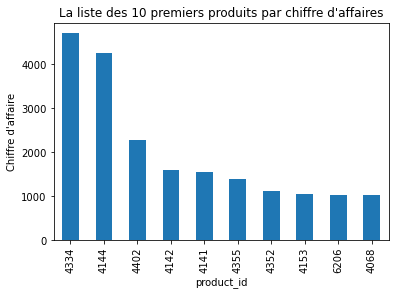

In [139]:
#On représente ce classement sous forme de digramme de bâton

erp4.sort_values(by=['CA'],ascending=False).head(10)['CA'].plot(kind='bar')
plt.title("La liste des 10 premiers produits par chiffre d'affaires")
plt.ylabel('Chiffre d\'affaire')
plt.show()

#### Chifffre d'affaire totale

On essai de calculer le chiffre d'affaire total faite en ligne 

In [140]:
#On calcule le chiffre d'affaire totale 

print(f"Le chiffre d'\affaire totale est de {sum(erp4['CA'])} € ")

Le chiffre d'ffaire totale est de 70568.6 € 


#### Analyse de distribution 

On fait une analyse de tendance centrale et une analyse de dispersion pour les prix et les chiffres d'affaire pour l'ensemble des prosuits et on peut par la suite l'afficher graphiquement.

In [141]:
# Pour les prix de prodiuits

prix = [min(erp4['price']),
       round(np.mean(erp4['price']),2),
       max(erp4['price']),
       round(np.std(erp4['price']),2),
       round(np.var(erp4['price']),2),
       np.median(erp4['price']),]
    

#Conversion en DataFrame
prix = pd.DataFrame(prix).T
    
    
#on renomme les noms des lignes et colonnes
prix = prix.rename(index = {0:'prix'}, columns = {0:'min',1:'moyenne',2:'max',3:'écart-type',4:'variance',5:'médiane'})
    
prix

,min,moyenne,max,écart-type,variance,médiane
prix,5.2,32.49,225.0,27.79,772.34,23.55


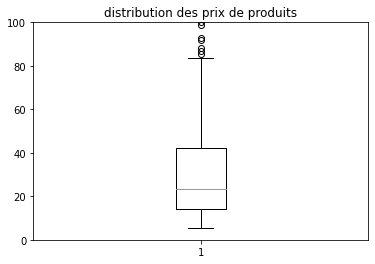

In [142]:
# On peut réaliser une boite a moustache 

plt.boxplot(erp4['price'])
plt.ylim(0,100)
plt.title('distribution des prix de produits')
plt.savefig('box_price.png')
plt.show()

In [143]:
# Pour les chiffres d'affaires de produits

CA = [min(erp4['CA']),
       round(np.mean(erp4['CA']),2),
       max(erp4['CA']),
       round(np.std(erp4['CA']),2),
       round(np.var(erp4['CA']),2),
       np.median(erp4['CA']),]

#Conversion en DataFrame
CA = pd.DataFrame(CA).T
    
    
#on renomme les noms des lignes et colonnes
CA = CA.rename(index = {0:'chiffre d\'affaire '}, columns = {0:'min',1:'moyenne',2:'max',3:'écart-type',4:'variance',5:'médiane'})
    
CA

,min,moyenne,max,écart-type,variance,médiane
chiffre d'affaire,0.0,98.84,4704.0,307.47,94537.51,15.25


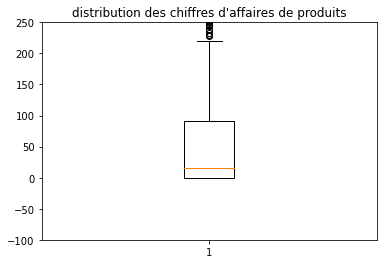

In [144]:
# On peut réaliser une boite a moustache 

plt.boxplot(erp4['CA'])
plt.ylim(-100,250)
plt.title('distribution des chiffres d\'affaires de produits')
plt.savefig('box_ca.png')
plt.show()

### 3-4 Analyse de valeurs abérantes 

On cherche à analyser les valeurs des prix pour chaque produit

In [145]:
#On va reprendre le fichier ERP4

erp4.head(10)

,product_id,price,stock_quantity,total_sales,CA
product_id,,,,,
3847,3847,24.2,0,6.0,145.2
3849,3849,34.3,0,0.0,0.0
3850,3850,20.8,0,0.0,0.0
4032,4032,14.1,0,3.0,42.3
4039,4039,46.0,0,0.0,0.0
4040,4040,34.3,0,0.0,0.0
4041,4041,32.7,15,0.0,0.0
4042,4042,31.2,34,7.0,218.4
4043,4043,60.0,12,3.0,180.0


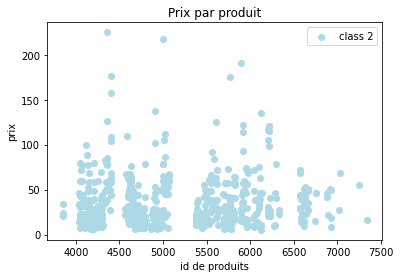

In [146]:
plt.scatter(erp4['product_id'], erp4['price'], c='lightblue', label='class 2')

plt.legend()

plt.title('Prix par produit')
plt.xlabel('id de produits')
plt.ylabel('prix')
plt.savefig('ScatterPlot_04.png')
plt.show()

On fait aussi une analyse par la boite à moustache pour voir la présence des outliers.

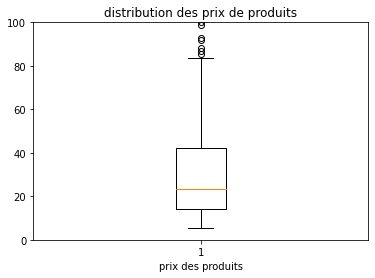

In [32]:
# On peut réaliser une boite a moustache 

plt.boxplot(erp4['price'])
plt.ylim(0,100)
plt.xlabel('prix des produits')
plt.title('distribution des prix de produits')
plt.savefig('box_price.png')
plt.show()

On remarque qu'il y a peut-être des valeurs abérrantes sur les prix des produits de plus de 80€.On peut prendre en compte que les id des produits qui ont une valeur de plus de 80€



#### Choix du seuil de limite de la valeur abérrante

On doit chercher le seuil de la valeur abérrante à partir d'un diagramme à bâton pour les prosits de plus de 80€.

In [165]:
erp4['seuil'] = np.where(erp4['price'] >= 80,1,0)
erp4.head(20)

C:\Users\Sofiane\AppData\Local\Temp/ipykernel_16836/2452677190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erp4['seuil'] = np.where(erp4['price'] >= 80,1,0)


,product_id,price,stock_quantity,total_sales,CA,seuil
product_id,,,,,,
3847,3847,24.2,0,6.0,145.2,0
3849,3849,34.3,0,0.0,0.0,0
3850,3850,20.8,0,0.0,0.0,0
4032,4032,14.1,0,3.0,42.3,0
4039,4039,46.0,0,0.0,0.0,0
4040,4040,34.3,0,0.0,0.0,0
4041,4041,32.7,15,0.0,0.0,0
4042,4042,31.2,34,7.0,218.4,0
4043,4043,60.0,12,3.0,180.0,0


In [166]:
y = list(erp4['seuil'])

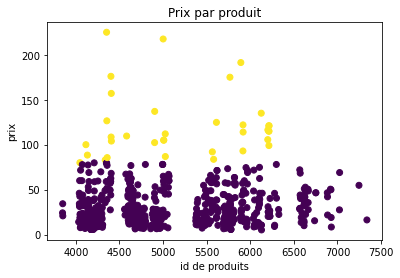

In [167]:
#On peut représenter le nuage des points avec une classe

plt.scatter(erp4['product_id'], erp4['price'], c = y, label='class 4')
plt.title('Prix par produit')
plt.xlabel('id de produits')
plt.ylabel('prix')
plt.savefig('ScatterPlot_04.png')
plt.show()

In [172]:
df = np.unique(erp4["seuil"],return_counts = True)
df

(array([0, 1]), array([679,  35], dtype=int64))

In [173]:
df, val =  np.unique(erp4["seuil"],return_counts = True)
val

array([679,  35], dtype=int64)

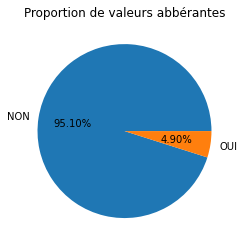

In [175]:
#Diagramme circulaire

plt.pie(val,labels = ["NON","OUI"], autopct = '%.2f%%')
plt.title('Proportion de valeurs abbérantes')
plt.show()

In [176]:
#On prend en compte que les produits qui ont un prix supérieur à 80€

val_ab = erp4[erp4['price'] > 80]
val_ab

,product_id,price,stock_quantity,total_sales,CA,seuil
product_id,,,,,,
4115,4115,100.0,11,0.0,0.0,1
4132,4132,88.4,5,0.0,0.0,1
4337,4337,83.0,13,0.0,0.0,1
4352,4352,225.0,0,5.0,1125.0,1
4355,4355,126.5,2,11.0,1391.5,1
4359,4359,85.6,0,1.0,85.6,1
4402,4402,176.0,8,13.0,2288.0,1
4404,4404,108.5,2,2.0,217.0,1
4406,4406,157.0,3,0.0,0.0,1


In [177]:
val_ab.shape

(34, 6)

On remarque que 34 produits qui sont concernées par ces vaaleurs abérrantes dont 17 d'entre eux n'ont pas de chiffres d'affaire

In [178]:
#on index les prix des produits

rank_val = val_ab.iloc[:,[1,4]]


#On regroupe par les prix des produits
rank_val = rank_val.groupby(by="price").mean()

rank_val.head(10)

,CA
price,
83.0,0.0
83.7,0.0
85.6,85.6
86.8,0.0
88.4,0.0
92.0,0.0
93.0,0.0
99.0,0.0
100.0,0.0


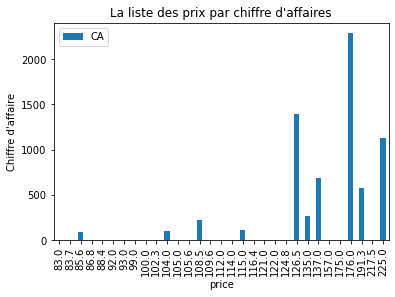

In [180]:
rank_val.plot(kind='bar')
plt.title("La liste des prix par chiffre d'affaires")
plt.ylabel('Chiffre d\'affaire')
plt.show()

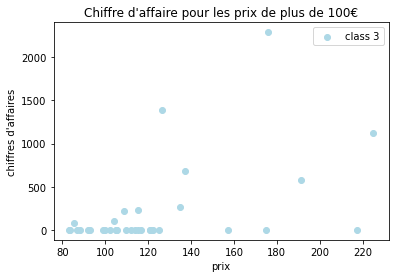

In [181]:
plt.scatter(val_ab['price'], val_ab['CA'], c='lightblue', label='class 3')

plt.legend()

plt.title('Chiffre d\'affaire pour les prix de plus de 100€')
plt.xlabel('prix')
plt.ylabel('chiffres d\'affaires')
plt.savefig('Chiffre d\'affaire.png')
plt.show()

On remarqu'il y a beaucoup de produits qu'il n'ont pas de chiffres d'affaires (égale à 0) donc beaucoup de produit à plus de 100 € n'ont pas été vendus


L'idéal est de prendre en compte que les produits qu'il coutent moins de 80 € car il y a peu de produit a plus de cette seuil


In [182]:
# prendre que les produits qui coutent moins de 80€
val_r = erp4[erp4['price'] <= 80]
val_r

,product_id,price,stock_quantity,total_sales,CA,seuil
product_id,,,,,,
3847,3847,24.2,0,6.0,145.2,0
3849,3849,34.3,0,0.0,0.0,0
3850,3850,20.8,0,0.0,0.0,0
4032,4032,14.1,0,3.0,42.3,0
4039,4039,46.0,0,0.0,0.0,0
...,...,...,...,...,...,...
6930,6930,8.4,83,5.0,42.0,0
7023,7023,27.5,15,0.0,0.0,0
7025,7025,69.0,2,0.0,0.0,0


### 3-5  Analyse bivariées

Pour finir on va faire quelques analyse bivariés entre ces 3 variables :
- le prix des produits
- les chiffres d'affaires
- le nombre de ventes de produits

#### Prix et chiffres d'affaires

On commence par faire une analyse de deux variables entres les prix des produits et leurs chiffres d'affaires 

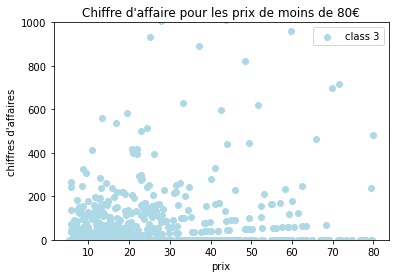

In [183]:
# 1er nuage de points

plt.scatter(val_r['price'], val_r['CA'], c='lightblue', label='class 3')

plt.legend()

plt.title('Chiffre d\'affaire pour les prix de moins de 80€')
plt.xlabel('prix')
plt.ylabel('chiffres d\'affaires')
plt.ylim(0,1000)
plt.savefig('Chiffre d\'affaire.png')
plt.plot(linestyle = 'solid')
plt.show()

#### Regression linaire

On a construire une droite de regression linéaires en lien entre les chiffres d'affaires et les prix des produits

In [184]:
#On peut faire une regresion linéaire en important une librairie
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [185]:
#regression linéaire

Y = val_r['CA']
X = val_r[['price']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)

In [186]:
a,b = result.params['price'],result.params['intercept']

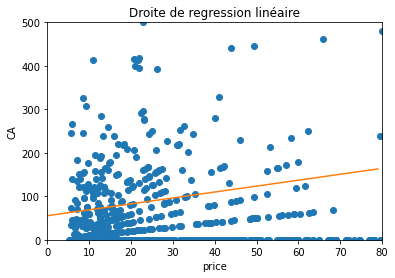

In [187]:
#on affiche graphiquement la droite de regression

plt.plot(val_r.price,val_r.CA, "o")
plt.plot(np.arange(80),[a*x+b for x in np.arange(80)])
plt.xlabel("price")
plt.ylabel("CA")
plt.ylim(0,500)
plt.xlim(0,80)
plt.title("Droite de regression linéaire")
plt.show()

#### Nombre de ventes et chiffres d'affaires

On commence par faire une analyse de deux variables entres le nombre de ventes des produits et leurs chiffres d'affaires avec une regression linéaire 

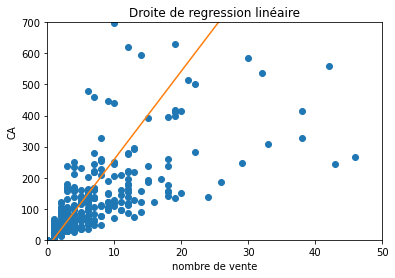

In [188]:
#regression linéaire

Y = val_r['CA']
X = val_r[['total_sales']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)


a,b = result.params['total_sales'],result.params['intercept']


#on affiche graphiquement la droite de regression

plt.plot(val_r.total_sales,val_r.CA, "o")
plt.plot(np.arange(80),[a*x+b for x in np.arange(80)])
plt.xlabel("nombre de vente")
plt.ylabel("CA")
plt.ylim(0,700)
plt.xlim(0,50)
plt.title("Droite de regression linéaire")

plt.show()

#### Nombre de ventes et prix

On commence par faire une analyse de deux variables entres le prix des produits et leurs chiffres d'affaires avec une regression linéaire 

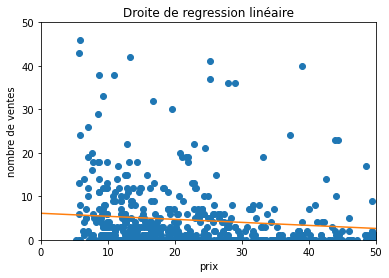

In [189]:
#regression linéaire

Y = val_r['total_sales']
X = val_r[['price']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)


a,b = result.params['price'],result.params['intercept']


#on affiche graphiquement la droite de regression

plt.plot(val_r.price,val_r.total_sales, "o")
plt.plot(np.arange(80),[a*x+b for x in np.arange(80)])
plt.xlabel("prix")
plt.ylabel("nombre de ventes")
plt.ylim(0,50)
plt.xlim(0,50)
plt.title("Droite de regression linéaire")

plt.show()

In [190]:
#on peut calculer le coefficient de corrélation  linéaire

print(f'le coefficient de corrélation linéaire entre la ventes et le chiffre d\'affaire est  {round(np.corrcoef(val_r.total_sales,val_r.CA)[0,1],2)}.')
print(f'le coefficient de corrélation linéaire entre le prix et le chiffre d\'affaire est  {round(np.corrcoef(val_r.price,val_r.CA)[0,1],2)}.')
print(f'le coefficient de corrélation linéaire entre la ventes et le prix est  {round(np.corrcoef(val_r.total_sales,val_r.price)[0,1],2)}.')


le coefficient de corrélation linéaire entre la ventes et le chiffre d'affaire est  0.83.
le coefficient de corrélation linéaire entre le prix et le chiffre d'affaire est  0.08.
le coefficient de corrélation linéaire entre la ventes et le prix est  -0.14.


#### Histogramme

On fait une représentation sous forme d'histogramme 

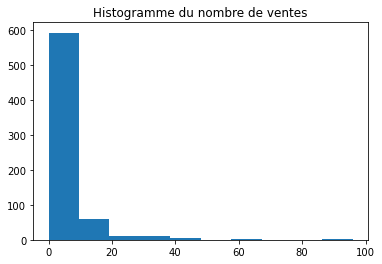

In [204]:
plt.hist(val_r.total_sales, bins=10)
plt.title('Histogramme du nombre de ventes')
plt.show()

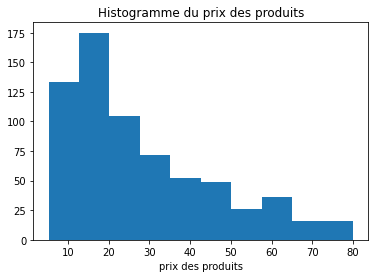

In [205]:
plt.hist(val_r.price, bins=10)
plt.title('Histogramme du prix des produits')
plt.xlabel('prix des produits')
plt.show()

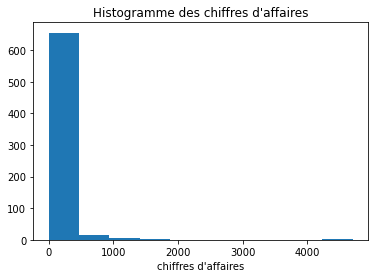

In [206]:
plt.hist(val_r.CA, bins=10)
plt.title('Histogramme des chiffres d\'affaires')
plt.xlabel('chiffres d\'affaires')
plt.show()

In [191]:
from sklearn.metrics import r2_score 


In [192]:
r2 = round(r2_score(val_r.total_sales,val_r.price),2)

print('r2 score for perfect model is', r2)

r2 score for perfect model is -12.49
